In [83]:
from pprint import pprint
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline  

In [84]:
plt.rcParams.update({'font.size': 12, 'font.serif': 'Times'})

In [85]:
alphas = [0.01, 0.2, 0.4, 0.6, 0.8, 0.99]

In [86]:
def get_area_power_func(alpha):
    beta = (1 - 1 / (0.5 ** 0.7)) * alpha + 1 / (0.5 ** 0.7)
    k = beta - alpha
    print('beta for power function: {:.2f}  coefficient for power function: {:.2f}'.format(beta, k))
    return lambda x, m: k * math.pow(x, 0.7) + alpha* math.pow(m, 0.7)

funcs = [get_area_power_func(x) for x in alphas]

beta for power function: 1.62  coefficient for power function: 1.61
beta for power function: 1.50  coefficient for power function: 1.30
beta for power function: 1.37  coefficient for power function: 0.97
beta for power function: 1.25  coefficient for power function: 0.65
beta for power function: 1.12  coefficient for power function: 0.32
beta for power function: 1.01  coefficient for power function: 0.02


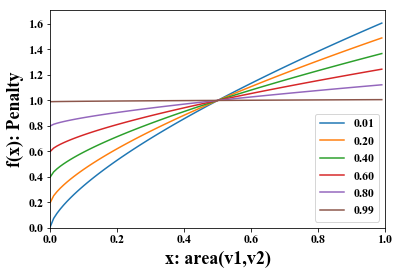

In [87]:
# NN alpha plot
M = 1
x_values = np.arange(0, M, 0.01)
plt.axis([0, M, 0, funcs[0](x_values[-1], M) + 0.1])
for i in range(6):
    f = funcs[i]
    plt.plot(x_values, [f(x, M) for x in x_values], label='{:.2f}'.format(alphas[i]))
plt.legend(loc='lower right')
plt.xlabel('x: area(v1,v2)', fontsize='18')
plt.ylabel('f(x): Penalty', fontsize='18')
plt.savefig('../../../images/param-alpha-m1.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()

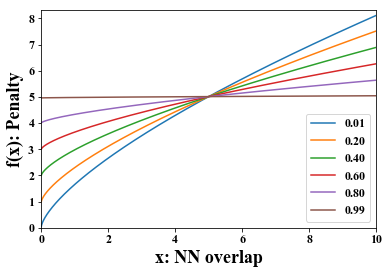

In [88]:
M = 10
x_values = np.arange(0, M, 0.01)
plt.axis([0, M, 0, funcs[0](x_values[-1], M) + 0.2])
for i in range(6):
    f = funcs[i]
    plt.plot(x_values, [f(x, M) for x in x_values], label='{:.2f}'.format(alphas[i]))
plt.legend(loc='lower right')
plt.xlabel('x: NN overlap', fontsize='18')
plt.ylabel('f(x): Penalty', fontsize='18')
plt.savefig('../../../images/param-alpha-m10.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()

In [131]:
def get_angle_linear_func(alpha):
    beta = 4 / math.pi - alpha
    k = beta - alpha
    print('beta for linear angle function: {:.2f}  coefficient for linear angle function: {:.2f}'.format(beta, k))
    return lambda x: k * x + alpha * math.pi / 2

def get_angle_quadratic_func(alpha):
    beta = 16 / (math.pi ** 2) - 3 * alpha
    k = beta - alpha
    print('beta for quadratic angle function: {:.2f}  coefficient for quadratic angle function: {:.2f}'.format(beta, k))
    return lambda x: k * math.pow(x, 2) + alpha * math.pow(math.pi, 2) / 4

beta for linear angle function: 1.26  coefficient for linear angle function: 1.25
beta for quadratic angle function: 1.59  coefficient for quadratic angle function: 1.58
beta for linear angle function: 1.17  coefficient for linear angle function: 1.07
beta for quadratic angle function: 1.32  coefficient for quadratic angle function: 1.22
beta for linear angle function: 1.07  coefficient for linear angle function: 0.87
beta for quadratic angle function: 1.02  coefficient for quadratic angle function: 0.82
beta for linear angle function: 0.97  coefficient for linear angle function: 0.67
beta for quadratic angle function: 0.72  coefficient for quadratic angle function: 0.42


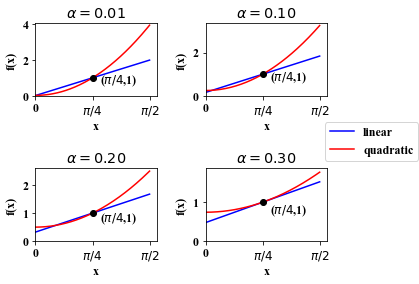

In [150]:
## EE curve plot
alphas = [0.01, 0.1, 0.2, 0.3]
x_values = np.arange(0, math.pi / 2, 0.01)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axes = [ax1, ax2, ax3, ax4]

for i, a in enumerate(alphas):
    f_li = get_angle_linear_func(a)
    f_quad = get_angle_quadratic_func(a)
    
    line1 = axes[i].plot(x_values, [f_li(x) for x in x_values], 'b-')
    line2 = axes[i].plot(x_values, [f_quad(x) for x in x_values], 'r-')
    axes[i].plot([math.pi / 4], [1], 'ko')
    axes[i].annotate('($\pi/4$,1)', (math.pi / 4, 1), (math.pi / 4 + 0.1, 0.7))
    
    axes[i].axis([0, math.pi / 2 + 0.1, 0, f_quad(x_values[-1]) + 0.1])
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(r'$\alpha={:.2f}$'.format(a))
    axes[i].set_xticks([0, math.pi / 4, math.pi / 2])
    axes[i].set_xticklabels([0, r'$\pi/4$', r'$\pi/2$'])

plt.subplots_adjust(right=0.8, hspace=1, wspace=0.4)
fig.legend([line1[0], line2[0]], ['linear', 'quadratic'], loc='center right', borderaxespad=0.1,)
fig.savefig('../../../images/param-gamma.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()